# Explore here

Una empresa ha recolectado la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019. Este conjunto de datos se utilizó para entrenar modelos de Machine Learning durante ese año, en una competición en abierto.

Este paso es vital para asegurar que nos quedamos con las variables estrictamente necesarias y eliminamos las que no son relevantes o no aportan información. Utiliza el Notebook de ejemplo que trabajamos y adáptalo a este caso de uso.

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en la lección.

In [1]:
# Your code here
import pandas as pd

total_data=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Guardamos en archivo csv

In [2]:
total_data.to_csv("../data/raw/total_data.csv")

In [3]:
total_data.shape

(48895, 16)

Dimensiones son 48895, 16.. Esto significa quenuestro DataFrame tiene 48895 filas y 16 columnas.

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     



Línea de cabecera de las columnas: Aquí se enumeran todas las columnas de tu DataFrame junto con algunas características adicionales:

Column: Nombre de la columna.
8 Categorical Characteristics (id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type, availability_365)
8 Numerical Characteristics (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count)

Non-Null Count: El número de valores no nulos en esa columna. Por ejemplo, 48895 non-null significa que todas las filas tienen valores no nulos en la columna correspondiente, excepto en las columnas 'name', 'host_name', 'last_review' y 'reviews_per_month', que tienen menos valores no nulos.

In [5]:
total_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

last review y reviws per night contienes datos nulos. Pero creo son errelevantes en nuestro estudio y voy eliminar los totalmente sin eleiminat los nulos. 

In [6]:

duplicados=total_data.duplicated().sum()
duplicados

0

no hay duplicados

Eliminamos las columnas irrelevanyes en nustro estudio

In [7]:
total_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [8]:
len(total_data)

48895

In [9]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


In [10]:
total_data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

y ahora vemos que no hay dados nulos

categorical analiz

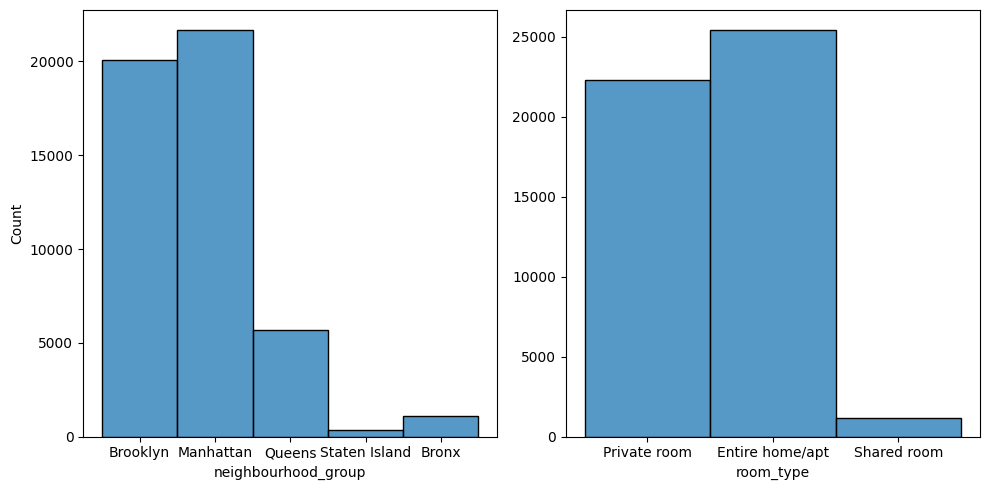

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 2, figsize = (10, 5))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = total_data, x = "room_type").set(ylabel = None)



# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()





Analize numerico

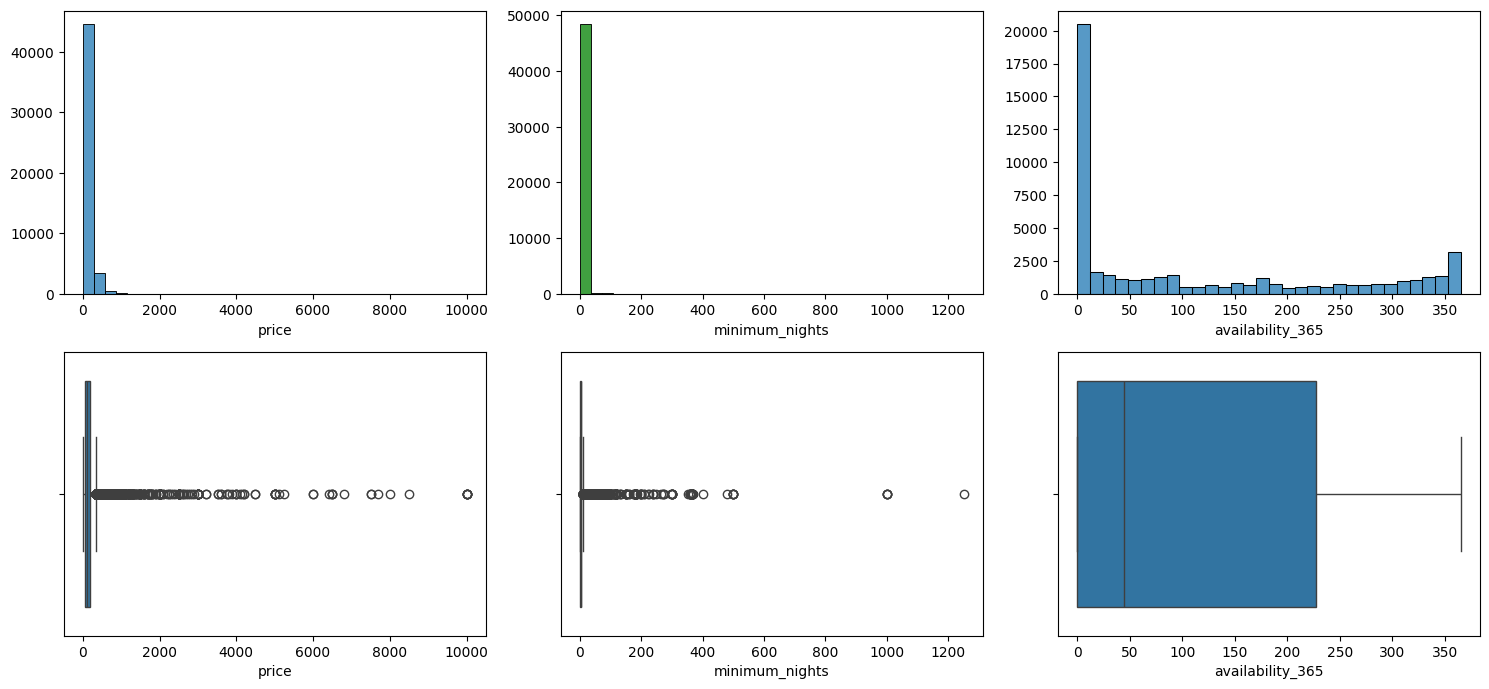

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.histplot(ax = axis[0, 0], data = total_data, x = "price",bins=35).set(ylabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")
sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights",bins=35, color='green').set(ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")
sns.histplot(ax = axis[0, 2], data = total_data, x = "availability_365").set(ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "availability_365")
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Numerico-numerico

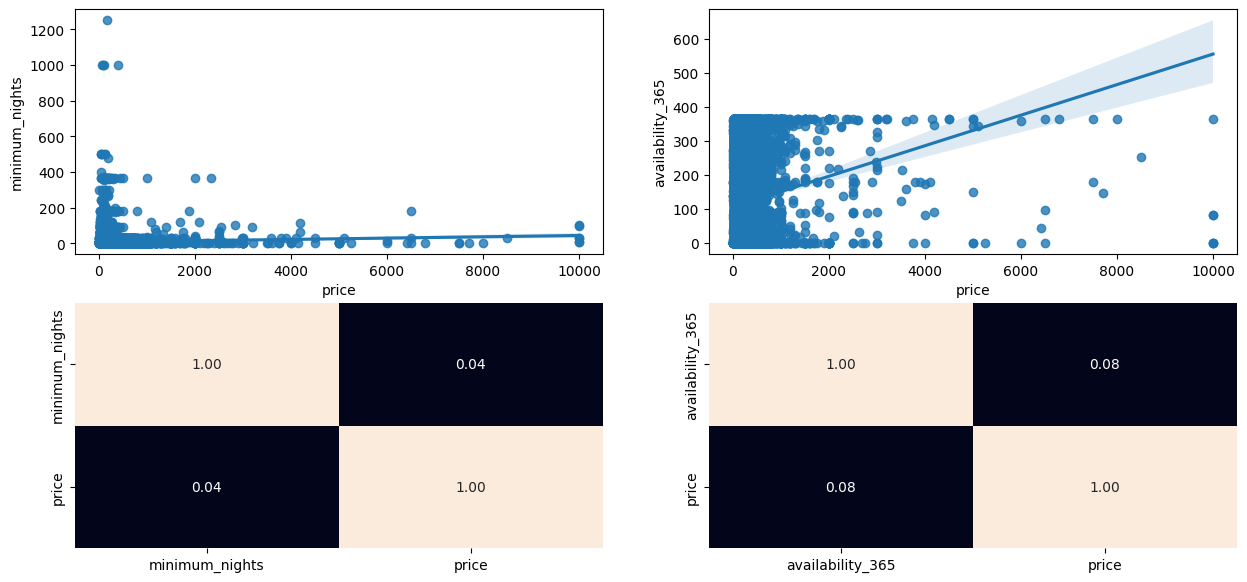

In [13]:
fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.regplot(ax = axis[0, 0], data = total_data , x = "price", y = "minimum_nights")
sns.heatmap(total_data[["minimum_nights", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data , x = "price", y = "availability_365")
sns.heatmap(total_data[["availability_365", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)


plt.show()

No hay relacion entre precio y minimun noches

categorico-categorico

<Axes: xlabel='neighbourhood', ylabel='count'>

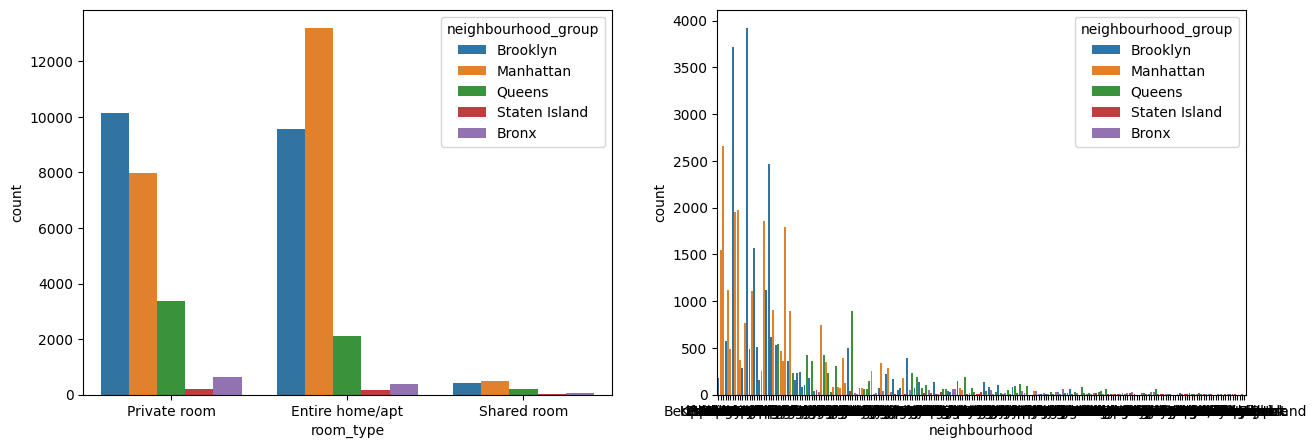

In [14]:

fig, axis = plt.subplots(1, 2, figsize = (15, 5))

sns.countplot(ax = axis[0], data = total_data, x = "room_type", hue = "neighbourhood_group")
sns.countplot(ax = axis[1], data = total_data, x = "neighbourhood", hue = "neighbourhood_group")

Brooklin es 1 en el arendamineto de Private room, Manhantan in entire room . Shared room no es muy famosa es decir no tiene mucha demanda en ningun sitio.

Para poder hacer relacion numrico y categorico tenemos que hacer factoizacion

In [15]:
total_data['room_type_n'] = pd.factorize(total_data['room_type'])[0]
total_data['neighbourhood_n'] = pd.factorize(total_data['neighbourhood'])[0]
total_data['neighbourhood_group_n'] = pd.factorize(total_data['neighbourhood_group'])[0]
total_data.head(5)



,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_n,neighbourhood_group_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0,2,1
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1,3,0
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,4,1


#### Paso 4. Análisis multivariante

correlacion


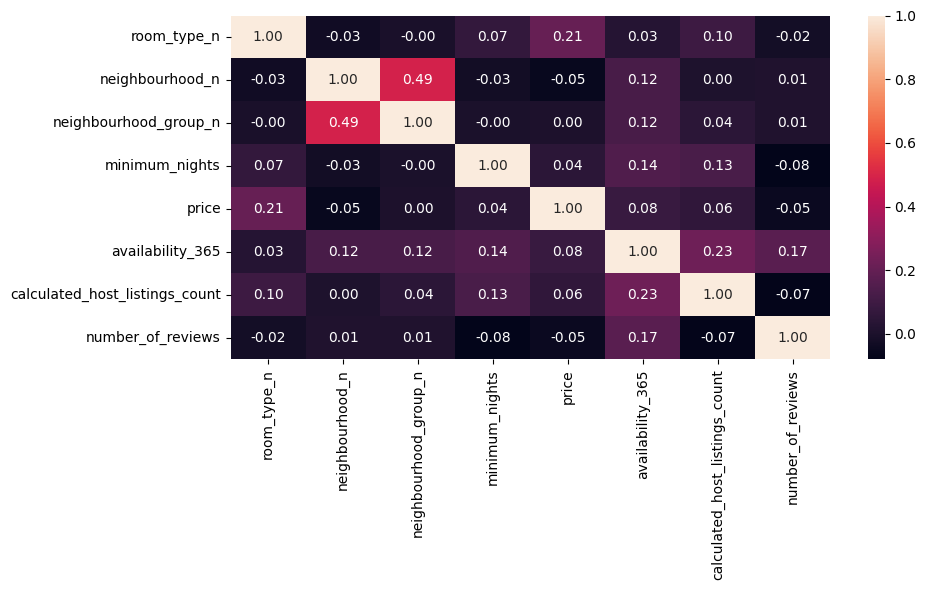

In [16]:

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["room_type_n", "neighbourhood_n", "neighbourhood_group_n", "minimum_nights", "price", "availability_365", "calculated_host_listings_count", "number_of_reviews"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()


neighbourhood_n", "neighbourhood_group_n" tienen algun arelacion, los demas poco. neighbourhood_n y prece tienen alguna relacion.

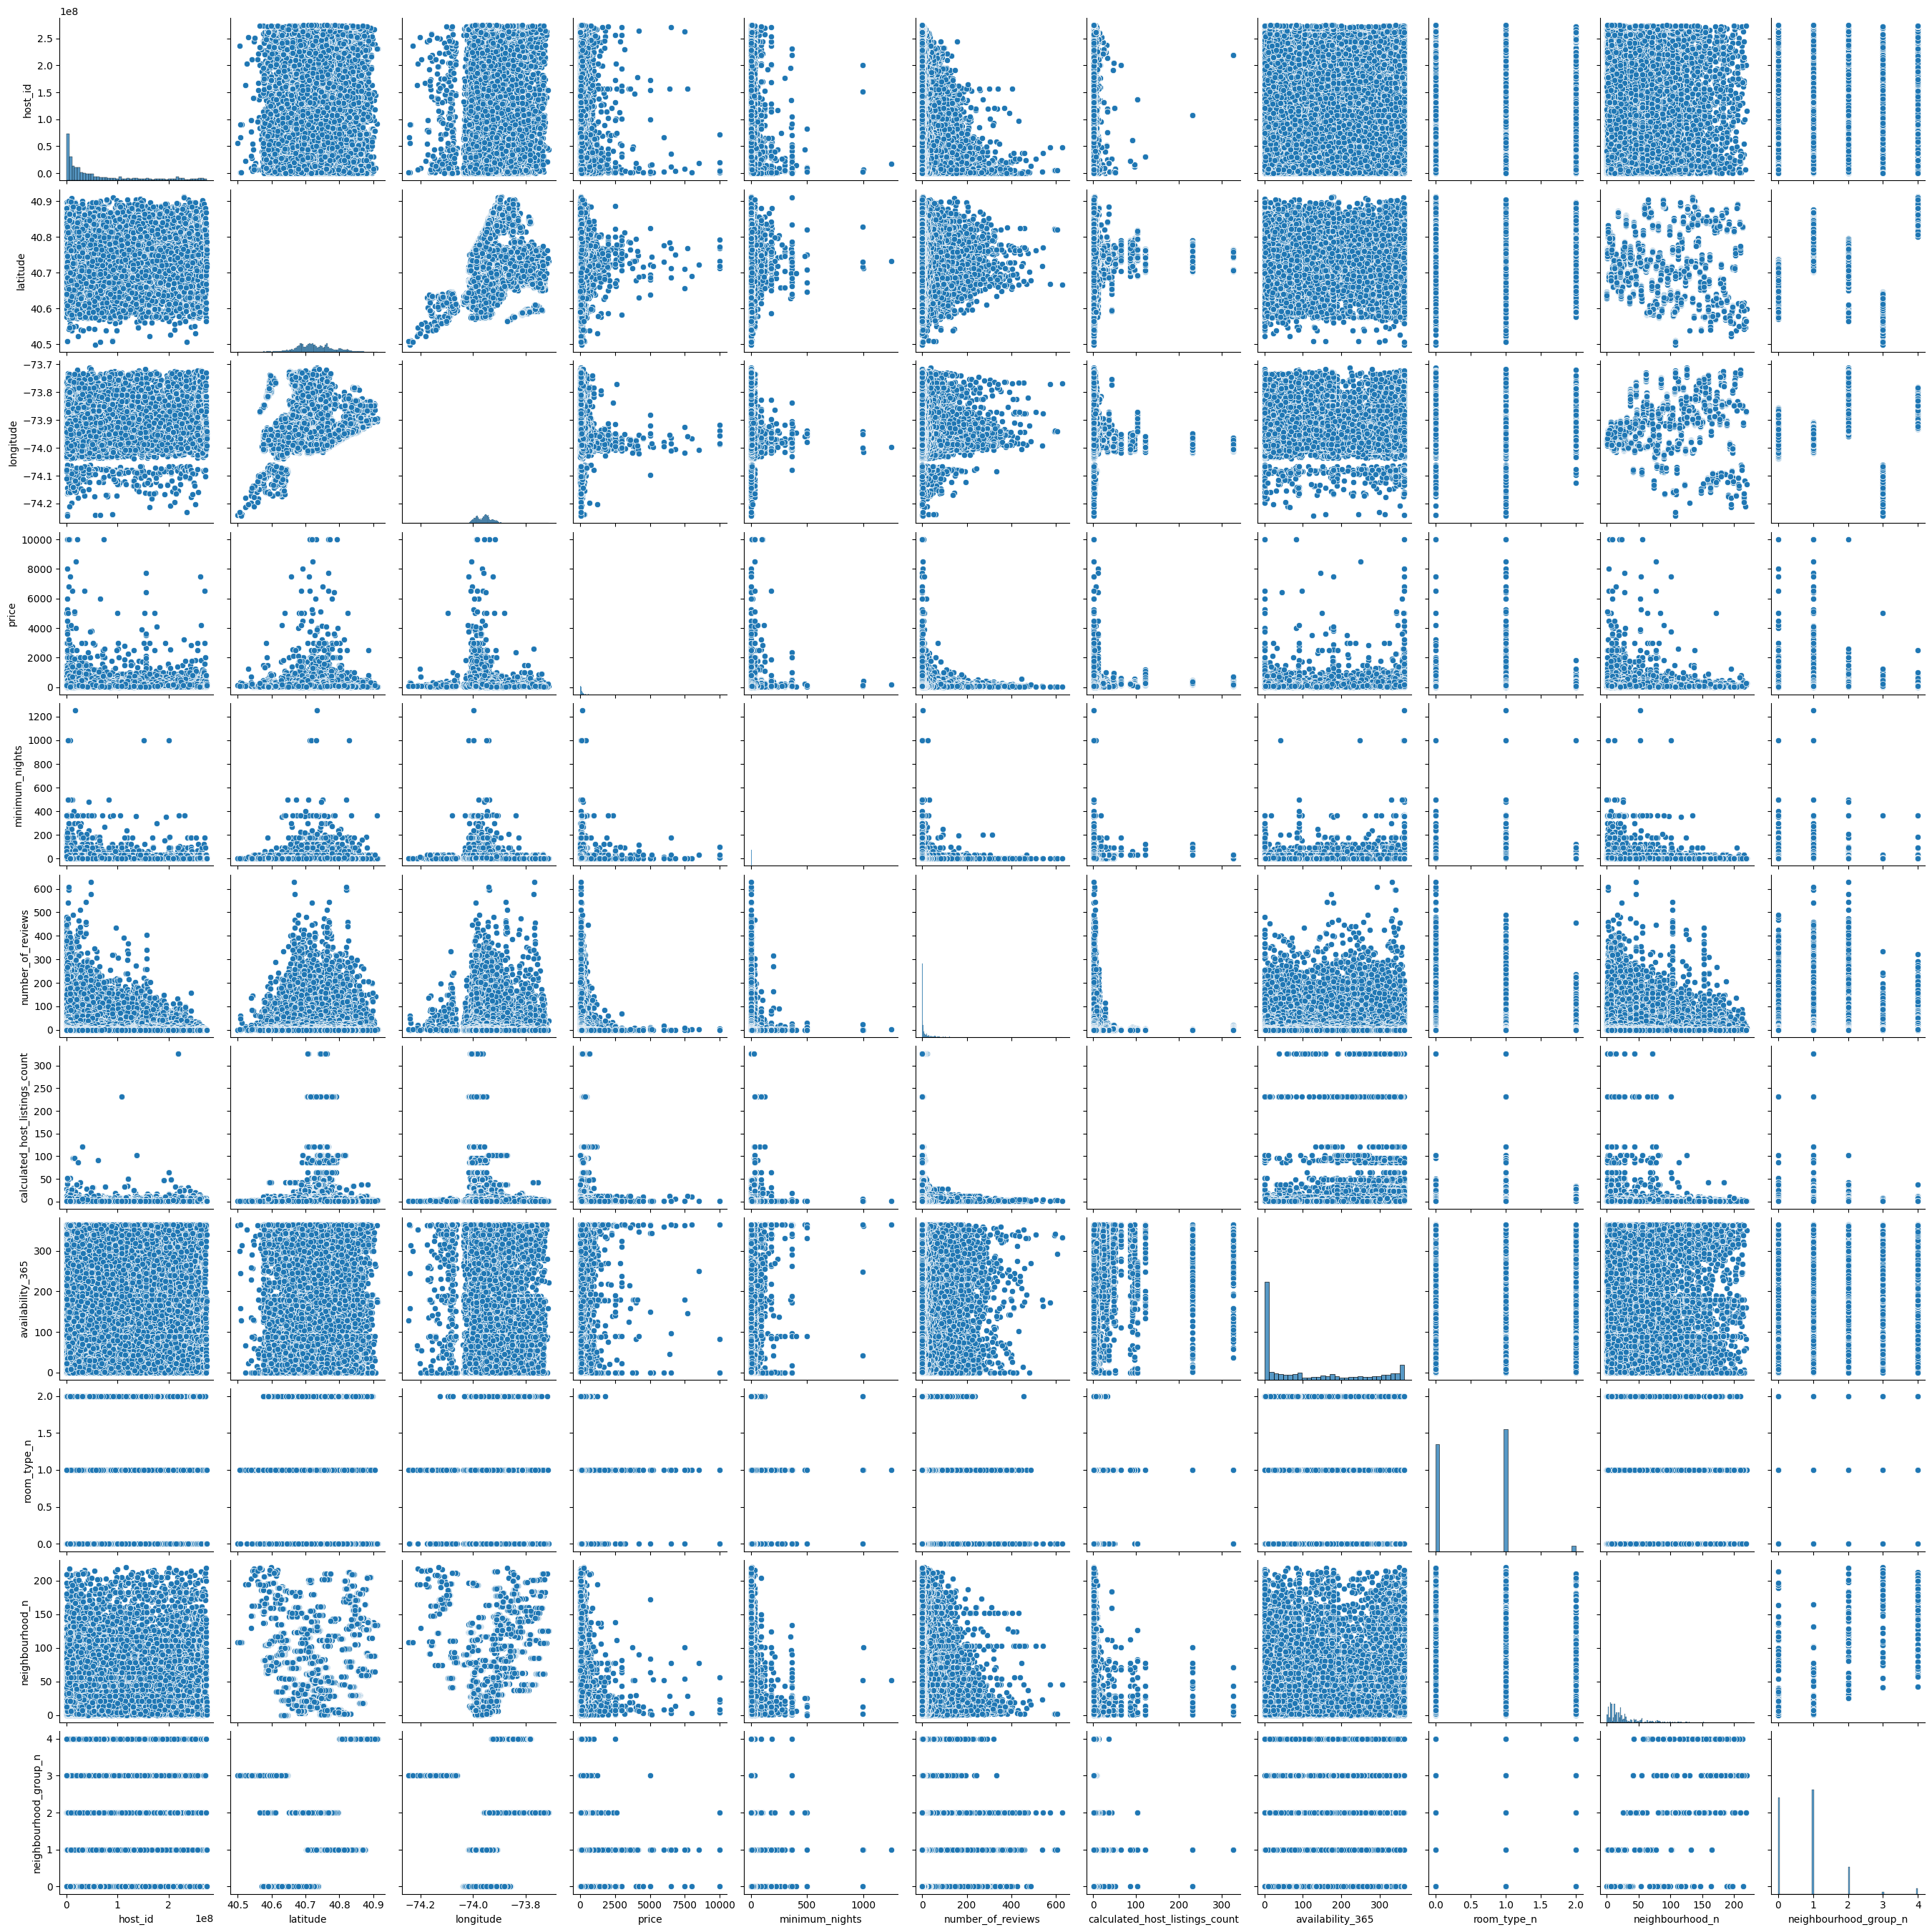

In [17]:
sns.pairplot(data = total_data)

2 dia

Analisis de outliers

In [18]:
total_data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_n,neighbourhood_group_n
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327,0.567113,29.888782,0.786911
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289,0.541249,34.676634,0.844386
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,7.500000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,19.000000,1.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,37.000000,1.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,2.000000,220.000000,4.000000


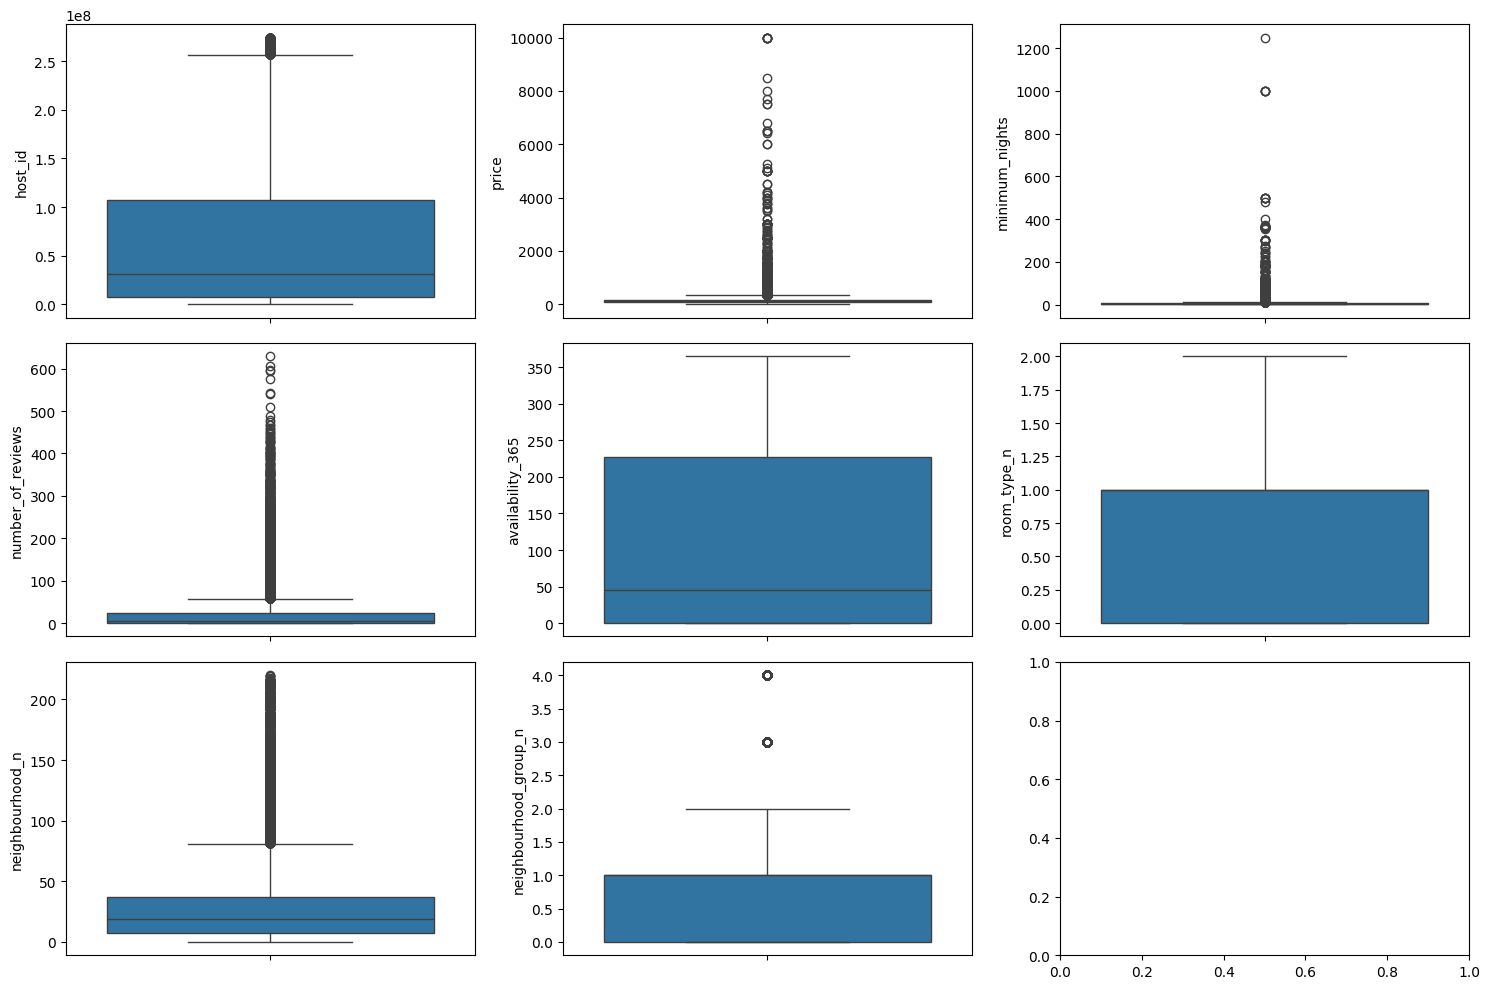

In [19]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "host_id")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "price")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "availability_365")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "room_type_n")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "neighbourhood_n")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "neighbourhood_group_n")

plt.tight_layout()

plt.show()

lo que veo no puedes alqullar por un precio 0. Y por otro lado min nights esta concetrado entere o y 600 pero tenemos que hacer un aliz profundo

Outliers price

In [20]:
price_stats = total_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [21]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los limites superior e inferior para la busqueda de outliers  {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")



Los limites superior e inferior para la busqueda de outliers  334.0 and -90.0, with an interquartile range of 106.0


El precio es nuestro target y solo elimamos los precios coste 0

In [22]:
Arbnb_df = total_data[total_data['price'] != 0]

Analizamos los noches alquilados 

In [23]:
nights_stats = total_data["minimum_nights"].describe()
nights_stats

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [24]:
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")

The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [25]:
count_0 = total_data[total_data["minimum_nights"] == 0].shape[0]
count_1 = total_data[total_data["minimum_nights"] == 1].shape[0]
count_2 = total_data[total_data["minimum_nights"] == 2].shape[0]
count_3 = total_data[total_data["minimum_nights"] == 3].shape[0]
count_4 = total_data[total_data["minimum_nights"] == 4].shape[0]
count_5 = total_data[total_data["minimum_nights"] == 5].shape[0]
count_6 = total_data[total_data["minimum_nights"] == 6].shape[0]
count_7 = total_data[total_data["minimum_nights"] == 7].shape[0]
count_8 = total_data[total_data["minimum_nights"] == 8].shape[0]
count_9 = total_data[total_data["minimum_nights"] == 9].shape[0]
count_10 = total_data[total_data["minimum_nights"] == 10].shape[0]
count_11 = total_data[total_data["minimum_nights"] == 11].shape[0]
count_12 = total_data[total_data["minimum_nights"] == 12].shape[0]
count_15 = total_data[total_data["minimum_nights"] == 15].shape[0]
count_25 = total_data[total_data["minimum_nights"] == 25].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)
print("Count of 5: ", count_5)
print("Count of 6: ", count_6)
print("Count of 7: ", count_7)
print("Count of 8: ", count_8)
print("Count of 9: ", count_9)
print("Count of 10: ", count_10)
print("Count of 11: ", count_11)
print("Count of 12: ", count_12)
print("Count of 15: ", count_15)
print("Count of 25: ", count_25)

Count of 0:  0
Count of 1:  12720
Count of 2:  11696
Count of 3:  7999
Count of 4:  3303
Count of 5:  3034
Count of 6:  752
Count of 7:  2058
Count of 8:  130
Count of 9:  80
Count of 10:  483
Count of 11:  33
Count of 12:  91
Count of 15:  279
Count of 25:  82


lo que se ve las noches de 75%- son 5 noches , por ello hay muchas outliers

In [26]:
Arbnb_df = total_data[total_data['minimum_nights'] <=15 ]


print(Arbnb_df.describe())

            host_id      latitude     longitude         price  minimum_nights  \
count  4.327400e+04  43274.000000  43274.000000  43274.000000    43274.000000   
mean   6.708460e+07     40.727992    -73.950717    148.776910        2.962726   
std    7.842912e+07      0.055419      0.047180    210.765504        2.500243   
min    2.571000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.805506e+06     40.688810    -73.982307     69.000000        1.000000   
50%    3.098576e+07     40.721320    -73.954545    100.000000        2.000000   
75%    1.051546e+08     40.762990    -73.934450    175.000000        4.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000       15.000000   

       number_of_reviews  calculated_host_listings_count  availability_365  \
count       43274.000000                    43274.000000      43274.000000   
mean           25.215256                        3.369414        100.117022   
std            46.291490            

In [27]:
# Stats for number_of_reviews

review_stats = total_data["number_of_reviews"].describe()
review_stats

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [28]:
# IQR for number_of_reviews

review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(review_iqr, 2)}")

The upper and lower limits for finding outliers are 58.5 and -33.5, with an interquartile range of 23.0


Límite inferior: Q1 - 1.5 * IQR = 1.000000 - 1.5 * 23.000000 = -34.500000 (no tiene sentido para el número de revisiones)
Límite superior: Q3 + 1.5 * IQR = 24.000000 + 1.5 * 23.000000 = 60.500000
Como el límite inferior no tiene sentido para el contexto de número de revisiones, podemos ignorarlo. Por lo tanto, cualquier valor por encima de 60.5 sería considerado un outlier

In [29]:
outliers = total_data[total_data["number_of_reviews"] > upper_limit]
print("\nCantidad de outliers (valores por encima de", upper_limit, "):", len(outliers))


Cantidad de outliers (valores por encima de 58.5 ): 6021


Outlier detection for calculated_host_listings_coun

In [30]:
# Stats for calculated_host_listings_count

hostlist_stats = total_data["calculated_host_listings_count"].describe()
hostlist_stats

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [31]:
# IQR for calculated_host_listings_count

hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hostlist_iqr, 2)}")

The upper and lower limits for finding outliers are 3.5 and -0.5, with an interquartile range of 1.0


Como el límite inferior no tiene sentido para este contexto, podemos ignorarlo. Por lo tanto, cualquier valor por encima de 3.5 sería considerado un outlier.

In [32]:
count_04 = sum(1 for x in total_data["calculated_host_listings_count"] if x in range(0, 5))
count_1 = total_data[total_data["calculated_host_listings_count"] == 1].shape[0]
count_2 = total_data[total_data["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_04)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  43254
Count of 1:  32303
Count of 2:  6658


eliminamos propietarios que contengas mas de 4 casas

In [33]:
total_data = total_data[total_data["calculated_host_listings_count"]  <=4]

In [34]:
# Count NaN
total_data.isnull().sum().sort_values(ascending = False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_n                       0
neighbourhood_n                   0
neighbourhood_group_n             0
dtype: int64

no lo hay valores nulos

Dividimos en dos dataset. Featute escaling. Normalizacion

In [35]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
df_scal["price"] = total_data["price"]
df_scal.head()

ValueError: could not convert string to float: 'Manhattan'